## Next thing to do is to get the top five of the countries with most cases, and study them in details

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/covid_2

Mounted at /content/drive
/content/drive/MyDrive/covid_2


In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [3]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt


from pathlib import Path
data_dir = Path('/content/drive/MyDrive/covid_2')

import os
os.listdir(data_dir)

import warnings
warnings.filterwarnings('ignore')

In [5]:
cleaned_data = pd.read_csv(data_dir/'cleaned_data.csv',parse_dates=['Date'])
cleaned_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
grouped_us = cleaned_data[cleaned_data['Country/Region'] == "US"].reset_index()
grouped_us_date = grouped_us.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_UK = cleaned_data[cleaned_data['Country/Region'] == "United Kingdom"].reset_index()
grouped_UK_date = grouped_UK.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Brazil = cleaned_data[cleaned_data['Country/Region'] == "Brazil"].reset_index()
grouped_Brazil_date = grouped_Brazil.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Russia = cleaned_data[cleaned_data['Country/Region'] == "Russia"].reset_index()
grouped_Russia_date = grouped_Russia.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_India = cleaned_data[cleaned_data['Country/Region'] == "India"].reset_index()
grouped_India_date = grouped_India.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_rest = cleaned_data[~cleaned_data['Country/Region'].isin(['US', 'United Kingdom', 'Brazil', 'Russia', 'India'])].reset_index()
grouped_rest_date = grouped_rest.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

## US

In [7]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Comfirmed", "Deaths", "Recovered",'Active'))

trace1 = go.Scatter(x=grouped_us_date['Date'],y=grouped_us_date['Confirmed'],name="Confirmed",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_us_date['Date'],y=grouped_us_date['Deaths'],name="Deaths",line_color='red',mode='lines+markers',opacity=0.8)
trace3 = go.Scatter(x=grouped_us_date['Date'],y=grouped_us_date['Recovered'],name="Recovered",mode='lines+markers',line_color='green',opacity=0.8)
trace4 = go.Scatter(x=grouped_us_date['Date'],y=grouped_us_date['Active'],name="Active",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in US (TOP 1)</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

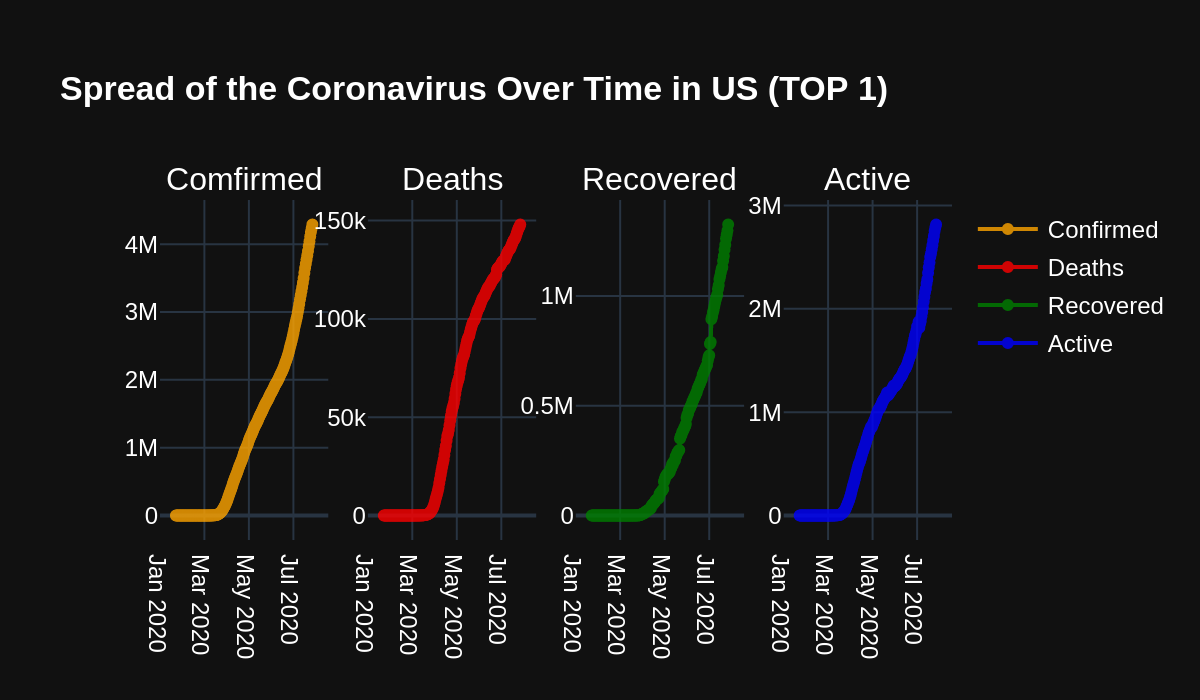

In [8]:
from IPython.display import Image
Image(fig.to_image(format="png", width=600, height=350, scale=2, engine="kaleido"))

In [10]:
# create map and display it
latitude = 40
longitude = -100
world_map = folium.Map(location=[latitude, longitude], zoom_start=3.5,tiles='Stamen Toner')

for lat, lon, Confirmed,Deaths,Recovered,name in zip(grouped_us['Lat'], grouped_us['Long'], grouped_us['Confirmed'],grouped_us['Deaths'],grouped_us['Recovered'], grouped_us['Country/Region']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
#world_map